<a href="https://colab.research.google.com/github/sohenney/2025-1_CV/blob/main/HW_2_6_2021025030_%EC%9D%B4%EC%86%8C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

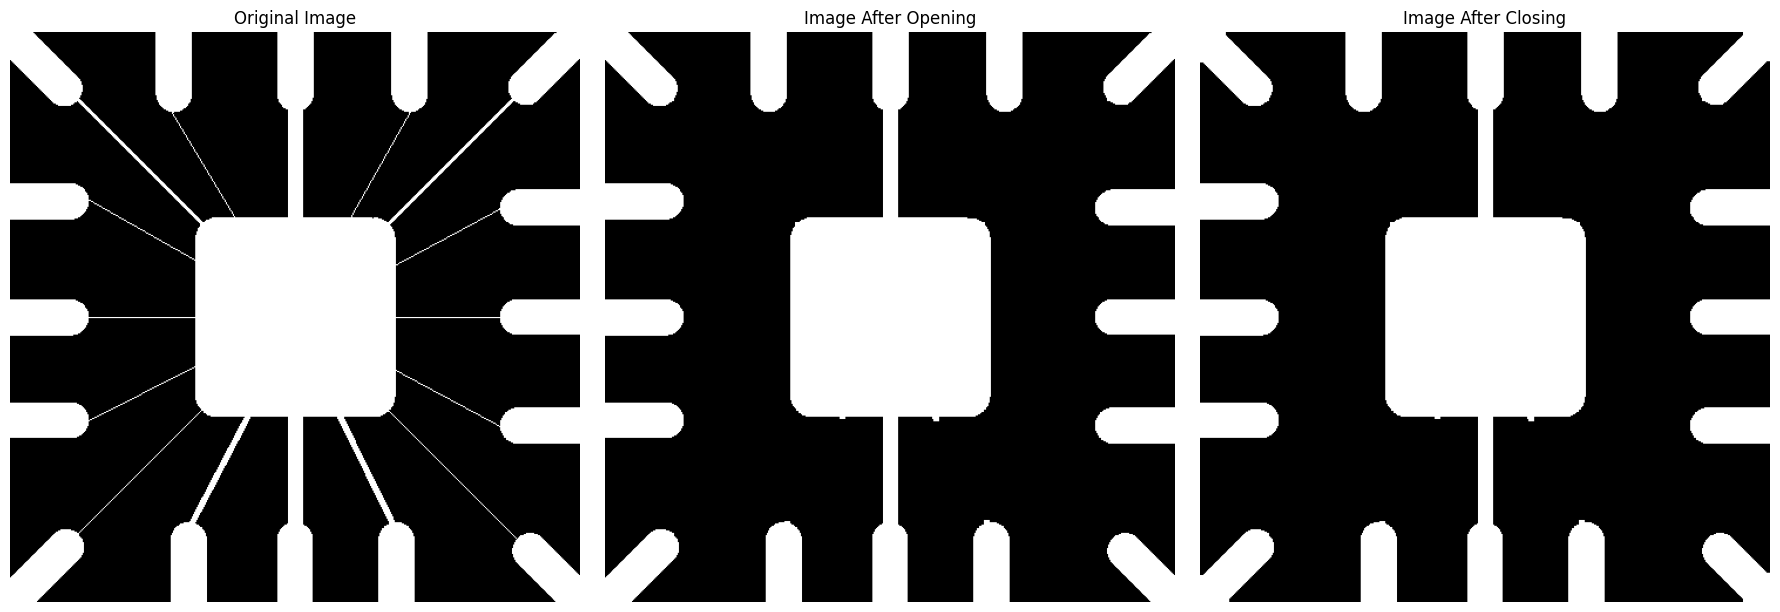

In [ ]:
import cv2  # 이미지 처리용 OpenCV 모듈
import numpy as np  # 수학적 계산과 배열을 다루는 NumPy
import matplotlib.pyplot as plt  # 시각화를 위한 Matplotlib
import urllib.request  # URL에서 이미지를 다운로드하기 위한 urllib

# 사용할 이미지 URL
image_url = 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif'

# URL에서 이미지를 가져오는 함수
def load_image_from_url(url):
    with urllib.request.urlopen(url) as response:
        img_data = np.asarray(bytearray(response.read()), dtype=np.uint8)
    return cv2.imdecode(img_data, cv2.IMREAD_GRAYSCALE)

# 이미지를 불러오기
image = load_image_from_url(image_url)

# 구조 요소 정의: 5x5 크기의 커널을 사용하여 형태학적 연산을 위한 마스크 생성
structuring_element = np.ones((5, 5), np.uint8)

# Opening 연산: 선 제거 (침식 후 팽창)
image_after_opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, structuring_element)

# Closing 연산: 선 제거 (팽창 후 침식)
image_after_closing = cv2.morphologyEx(image_after_opening, cv2.MORPH_CLOSE, structuring_element)

# 이미지 결과를 시각적으로 비교
plt.figure(figsize=(18, 6))

# 원본 이미지 표시
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Opening 처리 후 이미지 표시
plt.subplot(1, 3, 2)
plt.imshow(image_after_opening, cmap='gray')
plt.title("Image After Opening")
plt.axis('off')

# Closing 처리 후 이미지 표시
plt.subplot(1, 3, 3)
plt.imshow(image_after_closing, cmap='gray')
plt.title("Image After Closing")
plt.axis('off')

# 그래프 간 간격을 자동으로 맞추기
plt.tight_layout()
plt.show()


# ### 결과 분석 ###

# (a) 원본 이미지:
#   원본 이미지는 특정 패턴을 가지고 있지만 배경에 선분이라는 노이즈가 있음. 이는 오프닝과 클로징을 통해 제거할 수 있음.

# (b) Opening 연산 (침식 후 팽창):
#   Opening 연산은 작은 노이즈를 제거하는 데 효과가 좋음.
#   먼저 침식(Erosion)을 통해 이미지를 축소시키고 그 후 팽창(Dilation)을 통해 남아있는 주요 형태를 복원함.
#   결과적으로 선분들이 제거되어 지문 패턴이 더욱 뚜렷해짐.

# (c) Closing 연산 (팽창 후 침식):
#   Closing 연산은 주로 선을 부드럽게 하고 작은 검은 점들을 제거하는 데 효과가 좋음.
#   먼저 팽창을 통해 이미지를 확장시키고 그 후 침식(Erosion)을 통해 과도하게 확장된 부분을 줄임.
#   이 과정은 선들이 더 매끄럽게 보이도록 하고 작은 노이즈들을 제거함.

# ### 결론 ###:
#   - Opening은 작은 잡음을 제거하는 데 매우 효과적이며 선들이 깔끔해지도록 도움.
#   - Closing은 선을 부드럽게 하고 주요 형태를 더욱 선명하게 만들어 줌.
#   두 연산은 함께 사용하여 이미지를 개선하는 데 중요한 역할을 함.